Question 1

Applying Three Course Concepts to Fintech Trends in 2024
The fintech landscape in 2024 is shaped by rapid technological advancements, influencing how financial transactions occur, how risks are managed, and how regulation adapts to new challenges. To understand these trends, we can apply three key concepts from the Digital Finance course: Market Microstructure, Risk Management, and Regulation & Compliance. These frameworks highlight the fundamental shifts in financial markets and their implications.

1. Market Microstructure and Digital Payments
Market microstructure theory examines how transactions are executed, how prices are determined, and how liquidity is provided. In 2024, cross-border payments (Trend  9), digital wallets (Trend  6), and Banking-as-a-Service (BaaS) (Trend  10) are disrupting traditional financial institutions, creating new transaction mechanisms and market-making structures.
Cross-border payment innovations, leveraging blockchain and stablecoins, increase liquidity and reduce bid-ask spreads by eliminating intermediaries. Traditional correspondent banking networks often introduce inefficiencies, such as high fees and slow settlements, but modern fintech solutions enable near-instant, low-cost global transfers, improving price efficiency in currency exchange markets.
Digital wallets, once limited to simple transactions, now integrate investment and lending services, making them key liquidity providers. This shifts the role of financial intermediation from traditional banks to tech firms like Apple and Google.
BaaS allows non-financial companies to embed banking functionalities, offering financial services without the infrastructure of a traditional bank. This promotes competition and financial inclusion, lowering barriers for businesses to provide loans, payments, and credit solutions directly.
However, while these trends enhance liquidity and lower transaction costs, they also pose new challenges:
Increased volatility in asset pricing as real-time transactions and AI-driven financial decision-making accelerate price movements.
Risk of market power concentration, where a few dominant fintech firms dictate financial flows, potentially reducing market transparency and competition.
Regulatory gaps in financial oversight, as fintech disruptors may operate outside the jurisdiction of traditional banking regulations.



2. Risk Management in BNPL and Embedded Finance
Risk management is fundamental in finance, covering market risk, credit risk, and liquidity risk. In 2024, Buy Now, Pay Later (BNPL) (Trend  3), Embedded Finance (Trend  2), and AI-driven financial services (Trend  1) are reshaping how financial risks are assessed and managed.
BNPL services, such as Klarna and Affirm, introduce new forms of credit risk by allowing consumers to defer payments without traditional credit checks. While BNPL expands financial accessibility, it also increases the likelihood of defaults, as many consumers accumulate debt without a full understanding of their financial obligations.
Embedded finance integrates financial services within non-financial platforms, such as e-commerce and travel booking websites. While this reduces friction in financial transactions, it creates liquidity risks if the underlying platform fails or if financing partners lack sufficient reserves to cover defaults.
AI-powered financial services use predictive behavioral analysis to anticipate spending habits and optimize risk models. Machine learning enhances risk assessment through alternative credit scoring techniques, incorporating social and transaction data. However, reliance on AI introduces model risk, where algorithmic biases or data limitations could lead to incorrect risk evaluations.
To manage these risks, fintech firms are increasingly using advanced risk management models:
Value-at-Risk (VaR) calculations help BNPL providers estimate potential losses under extreme market conditions.
Liquidity risk assessments ensure that embedded finance platforms maintain adequate capital reserves to handle transaction failures and fund consumer loans.
Stress testing and scenario analysis allow AI-driven financial products to account for unexpected market conditions and user behavior shifts.
Despite these advances, risks remain:
Over-reliance on alternative credit scoring could exclude certain demographics or misclassify consumers, leading to increased loan defaults.
A systemic risk could emerge if BNPL and embedded finance firms grow too large without regulatory oversight, creating potential financial instability.

3. Regulation and Compliance in Open Banking and RegTech
As fintech firms gain influence, regulatory frameworks must adapt to new risks and financial structures. Key regulatory trends in 2024 include RegTech advancements (Trend 7), Open Banking evolution (Trend  5), and Climate-Conscious Financial Products (Trend 4), all of which are reshaping compliance, data protection, and sustainable finance.
RegTech solutions, such as ComplyAdvantage, leverage AI to automate regulatory compliance, particularly in Anti-Money Laundering (AML) and Know Your Customer (KYC) processes. By using machine learning to detect fraudulent activities, RegTech improves market efficiency by reducing bad trades. However, over-reliance on automated compliance may lead to false positives or regulatory blind spots.
Open banking requires financial institutions to share customer data with authorized third-party fintech firms, enhancing competition and innovation. While this increases market efficiency, it also raises concerns about data privacy and cybersecurity risks. Regulations such as GDPR (General Data Protection Regulation) in Europe and the Consumer Financial Protection Bureau (CFPB) mandates in the U.S. play a crucial role in ensuring consumer protection.
Climate-conscious financial products integrate Environmental, Social, and Governance (ESG) factors into financial decision-making, with fintech companies developing carbon footprint tracking tools and sustainable investment platforms. Regulators are increasing scrutiny on ESG reporting to prevent greenwashing, ensuring that sustainable financial products meet transparency and impact criteria.
Challenges in fintech regulation include:
Regulatory arbitrage, where firms operate in jurisdictions with fewer compliance requirements, exposing global financial markets to hidden risks.
Balancing innovation and consumer protection, ensuring that fintech solutions do not exploit regulatory loopholes at the expense of financial stability.
Complex cross-border compliance, as fintech firms expand globally, navigating different national regulations becomes increasingly difficult.
Ultimately, regulators must balance enabling financial innovation while safeguarding markets from new risks




Question 2.1

In [18]:
%pip install mplfinance

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, norm
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ibade\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [19]:

# File paths
file_paths = {
    "AC": "C:/Users/ibade/OneDrive/Bureau/Re MODS205 - Final project/AC.PA.csv",
    "ORA": "C:/Users/ibade/OneDrive/Bureau/Re MODS205 - Final project/ORA.PA.csv",
    "Interest_US5W": "C:/Users/ibade/OneDrive/Bureau/Re MODS205 - Final project/^IRX.csv",
    "CAC40": "C:/Users/ibade/OneDrive/Bureau/Re MODS205 - Final project/^FCHI.csv",
}

# Load datasets


data_frames = {key: pd.read_csv(path) for key, path in file_paths.items()}

common_dates = set(data_frames["AC"]["Date"])
for key in data_frames:
    common_dates.intersection_update(set(data_frames[key]["Date"]))

data_frames = {key: df[df["Date"].isin(common_dates)].reset_index(drop=True) for key, df in data_frames.items()}

for key in data_frames:
    data_frames[key]["Date"] = pd.to_datetime(data_frames[key]["Date"])

print("Lengths of datasets:", {key: len(df) for key, df in data_frames.items()})


Lengths of datasets: {'AC': 249, 'ORA': 249, 'Interest_US5W': 249, 'CAC40': 249}


Question 2.2

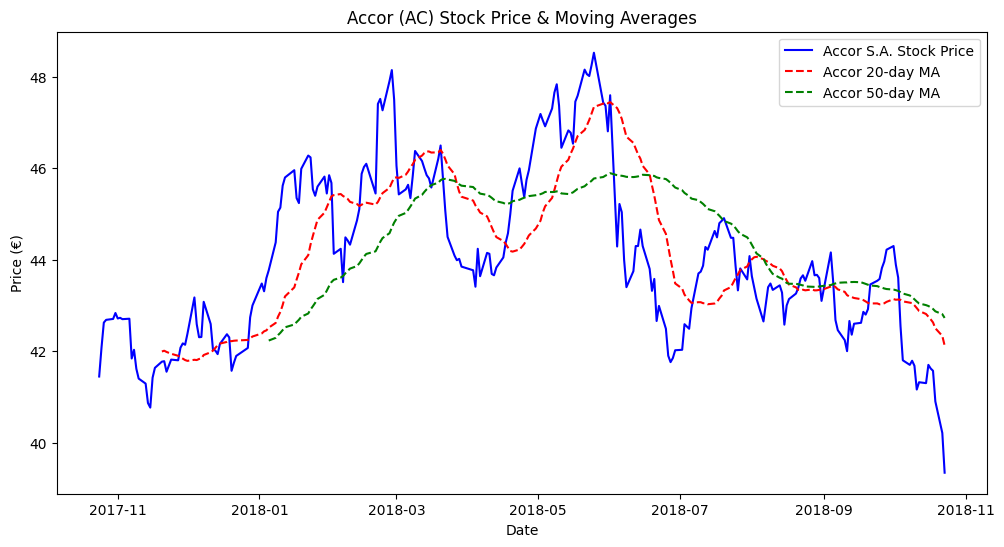

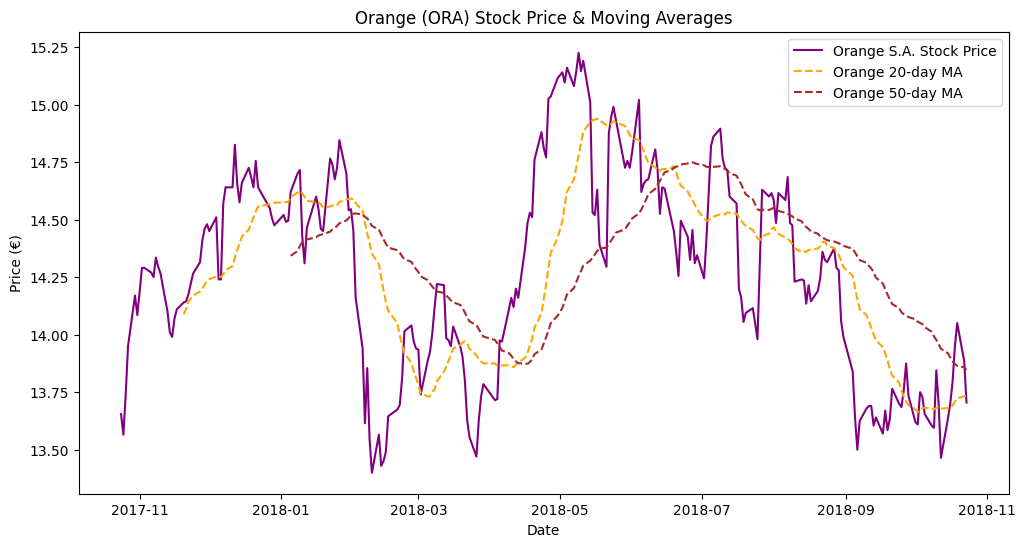

In [20]:
# Ensure "Date" is in datetime format & "Close" is numeric
for stock in ["AC", "ORA"]:
    data_frames[stock]["Date"] = pd.to_datetime(data_frames[stock]["Date"], errors='coerce')
    data_frames[stock]["Close"] = pd.to_numeric(data_frames[stock]["Close"], errors='coerce')
    data_frames[stock].dropna(subset=["Date", "Close"], inplace=True)

# Compute daily returns for AC and ORA
for stock in ["AC", "ORA"]:
    data_frames[stock]["Return"] = data_frames[stock]["Close"].pct_change()

# Compute optimized moving averages (20-day & 50-day)
for stock in ["AC", "ORA"]:
    data_frames[stock]["MA_20"] = data_frames[stock]["Close"].rolling(window=20).mean()
    data_frames[stock]["MA_50"] = data_frames[stock]["Close"].rolling(window=50).mean()

# **Plot : Accor (AC) stock prices in one graph**
plt.figure(figsize=(12, 6))
plt.plot(data_frames["AC"]["Date"].values, data_frames["AC"]["Close"].values, label="Accor S.A. Stock Price", color='blue')
plt.plot(data_frames["AC"]["Date"].values, data_frames["AC"]["MA_20"].values, label="Accor 20-day MA", color='red', linestyle="--")
plt.plot(data_frames["AC"]["Date"].values, data_frames["AC"]["MA_50"].values, label="Accor 50-day MA", color='green', linestyle="--")

plt.title("Accor (AC) Stock Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.legend()
plt.show()

# **Plot : Orange (ORA) stock prices in another graph**
plt.figure(figsize=(12, 6))
plt.plot(data_frames["ORA"]["Date"].values, data_frames["ORA"]["Close"].values, label="Orange S.A. Stock Price", color='purple')
plt.plot(data_frames["ORA"]["Date"].values, data_frames["ORA"]["MA_20"].values, label="Orange 20-day MA", color='orange', linestyle="--")
plt.plot(data_frames["ORA"]["Date"].values, data_frames["ORA"]["MA_50"].values, label="Orange 50-day MA", color='brown', linestyle="--")

plt.title("Orange (ORA) Stock Price & Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (€)")
plt.legend()
plt.show()


The stocks of Accor and Orange experienced significant fluctuations in 2018. Accor reached its peak at €49 in June 2018 and dropped to a low of €38 in October 2018, representing a decline of approximately 22% over a few months. Orange recorded its lowest price at €13.40 in February 2018 and its highest at €15.20 in June 2018, marking an increase of 13.4% before decreasing again. These variations highlight the volatility of financial markets and emphasize the importance of a strategic approach to optimize entry and exit points in trading.

Question 2.3

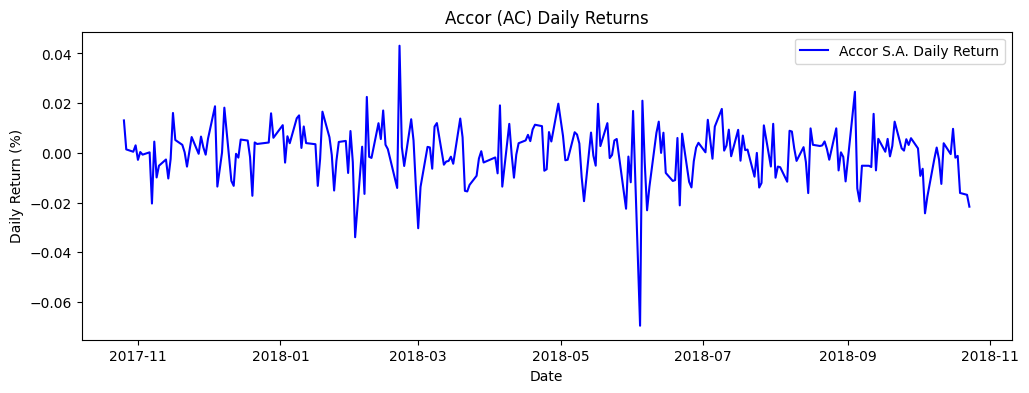

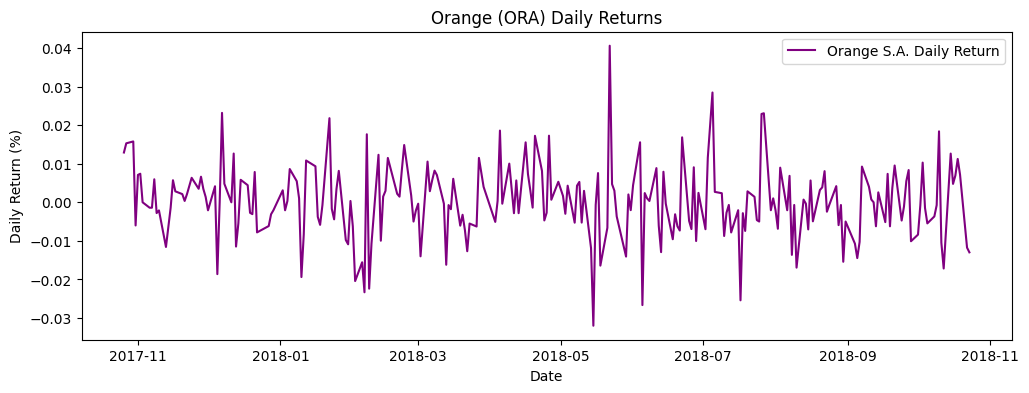

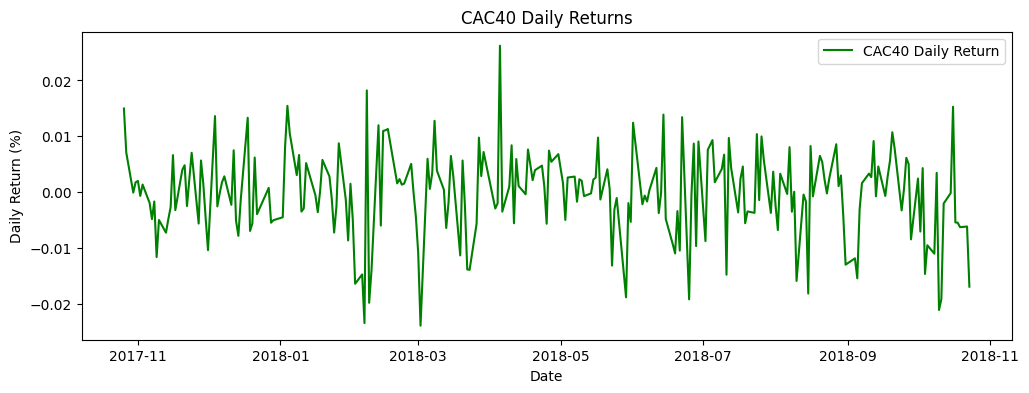

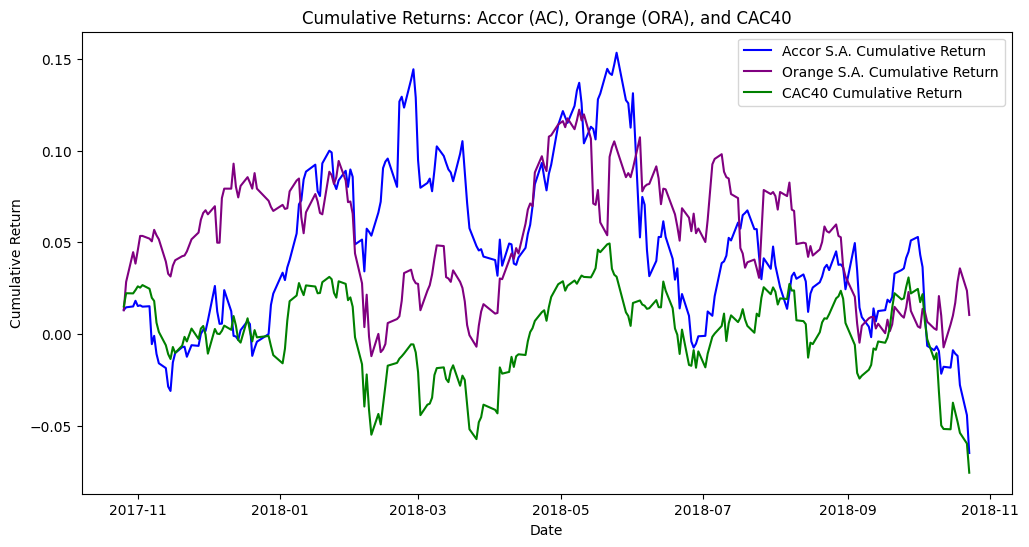

In [22]:
# Ensure "Date" is in datetime format & "Close" is numeric
for asset in ["AC", "ORA", "CAC40"]:
    data_frames[asset]["Date"] = pd.to_datetime(data_frames[asset]["Date"], errors='coerce')
    data_frames[asset]["Close"] = pd.to_numeric(data_frames[asset]["Close"], errors='coerce')
    data_frames[asset].dropna(subset=["Date", "Close"], inplace=True)

# Compute daily returns for AC, ORA, and CAC40
for asset in ["AC", "ORA", "CAC40"]:
    data_frames[asset]["Daily_Return"] = data_frames[asset]["Close"].pct_change()
    data_frames[asset].dropna(subset=["Daily_Return"], inplace=True)  # Drop NaN values

# Compute cumulative returns for AC, ORA, and CAC40
for asset in ["AC", "ORA", "CAC40"]:
    data_frames[asset]["Cumulative_Return"] = (1 + data_frames[asset]["Daily_Return"]).cumprod()-1

# Convert to NumPy arrays before plotting (avoids multi-dimensional indexing errors)
dates_ac = data_frames["AC"]["Date"].to_numpy()
dates_ora = data_frames["ORA"]["Date"].to_numpy()
dates_cac = data_frames["CAC40"]["Date"].to_numpy()

daily_ac = data_frames["AC"]["Daily_Return"].to_numpy()
daily_ora = data_frames["ORA"]["Daily_Return"].to_numpy()
daily_cac = data_frames["CAC40"]["Daily_Return"].to_numpy()

cumulative_ac = data_frames["AC"]["Cumulative_Return"].to_numpy()
cumulative_ora = data_frames["ORA"]["Cumulative_Return"].to_numpy()
cumulative_cac = data_frames["CAC40"]["Cumulative_Return"].to_numpy()

# **Plot Daily Returns - Separate Graphs**
plt.figure(figsize=(12, 4))
plt.plot(dates_ac, daily_ac, label="Accor S.A. Daily Return", color='blue')
plt.title("Accor (AC) Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(dates_ora, daily_ora, label="Orange S.A. Daily Return", color='purple')
plt.title("Orange (ORA) Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(dates_cac, daily_cac, label="CAC40 Daily Return", color='green')
plt.title("CAC40 Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.legend()
plt.show()

# **Plot Cumulative Returns - Single Graph**
plt.figure(figsize=(12, 6))
plt.plot(dates_ac, cumulative_ac, label="Accor S.A. Cumulative Return", color='blue')
plt.plot(dates_ora, cumulative_ora, label="Orange S.A. Cumulative Return", color='purple')
plt.plot(dates_cac, cumulative_cac, label="CAC40 Cumulative Return", color='green')
plt.title("Cumulative Returns: Accor (AC), Orange (ORA), and CAC40")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


The graph shows that both stocks are following the CAC40

Question 2.4


AC - Kurtosis: 5.8823, Skewness: -0.9363

ORA - Kurtosis: 1.6311, Skewness: 0.1538

CAC40 - Kurtosis: 0.6550, Skewness: -0.3505


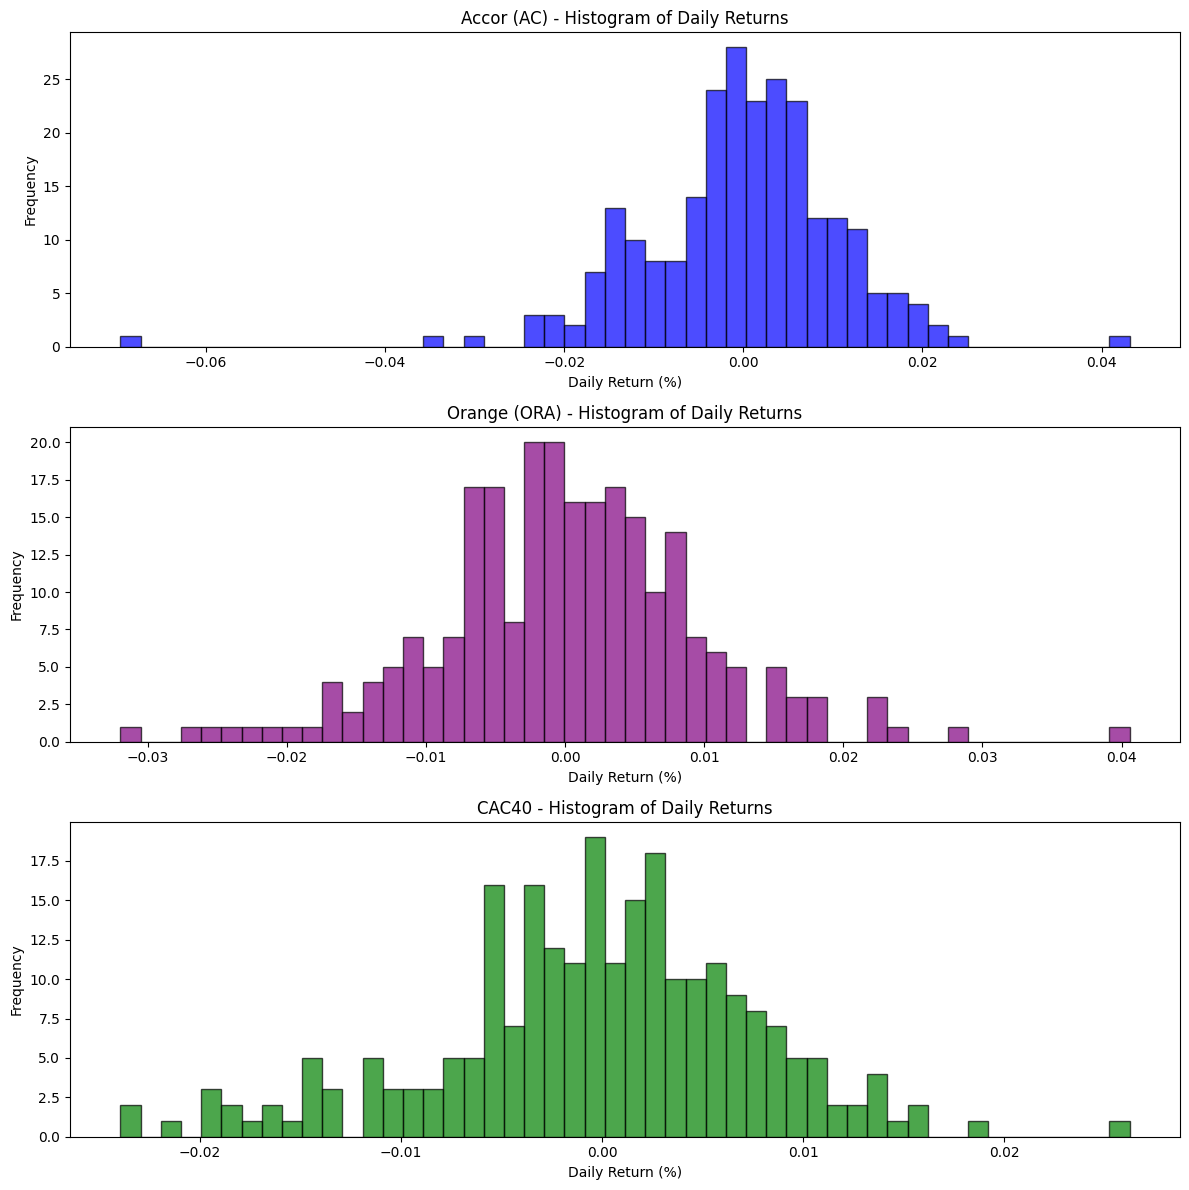

In [23]:
from scipy.stats import kurtosis, skew

# Compute kurtosis & skewness for daily returns of AC, ORA, and CAC40
for asset in ["AC", "ORA", "CAC40"]:
    k = kurtosis(data_frames[asset]["Daily_Return"], fisher=True)  # Fisher=True → Excess Kurtosis
    s = skew(data_frames[asset]["Daily_Return"])
    print(f"\n{asset} - Kurtosis: {k:.4f}, Skewness: {s:.4f}")

# **Plot Histograms for Daily Returns**
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Accor (AC) Histogram
axs[0].hist(data_frames["AC"]["Daily_Return"], bins=50, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title("Accor (AC) - Histogram of Daily Returns")
axs[0].set_xlabel("Daily Return (%)")
axs[0].set_ylabel("Frequency")

# Orange (ORA) Histogram
axs[1].hist(data_frames["ORA"]["Daily_Return"], bins=50, color='purple', alpha=0.7, edgecolor='black')
axs[1].set_title("Orange (ORA) - Histogram of Daily Returns")
axs[1].set_xlabel("Daily Return (%)")
axs[1].set_ylabel("Frequency")

# CAC40 Histogram
axs[2].hist(data_frames["CAC40"]["Daily_Return"], bins=50, color='green', alpha=0.7, edgecolor='black')
axs[2].set_title("CAC40 - Histogram of Daily Returns")
axs[2].set_xlabel("Daily Return (%)")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


The Accor stock exhibits a positive kurtosis, indicating highly volatile returns and, consequently, a high level of risk. Additionally, its negative skewness suggests a higher probability of negative returns, making it a poor investment choice due to its unfavorable risk-return profile.

For Orange, the kurtosis is also positive, but lower than that of Accor, meaning that its returns are less volatile and the associated risk is lower. Furthermore, its positive skewness indicates a higher probability of positive returns, making it a more attractive investment option compared to Accor.

Regarding the CAC40 index, the kurtosis is positive but relatively close to zero, making it the least risky investment among the three. However, its negative skewness implies a higher probability of extreme negative returns, which remains a potential downside risk to consider.

Question 2.5

In [24]:
import numpy as np

# Function to compute standard error of returns
def standard_error(series):
    return np.std(series, ddof=1) / np.sqrt(len(series))

# Compute standard error for full period and sub-periods (AC & ORA only)
for asset in ["AC", "ORA"]:
    df = data_frames[asset].copy()
    df = df.dropna(subset=["Daily_Return"])  # Remove NaN values

    # Full period standard error
    full_period_se = standard_error(df["Daily_Return"])
    
    # Define sub-periods
    n = len(df)
    sub_periods = np.array_split(df, 3)  # Split into 3 equal sub-periods
    
    # Compute standard error for each sub-period
    sub_se = [standard_error(sub["Daily_Return"]) for sub in sub_periods]
    
    # Print results
    print(f"\n{asset} - Standard Error of Daily Returns:")
    print(f"Full Period: {full_period_se:.6f}")
    for i, se in enumerate(sub_se, start=1):
        print(f"Sub-Period {i}: {se:.6f}")



AC - Standard Error of Daily Returns:
Full Period: 0.000714
Sub-Period 1: 0.001176
Sub-Period 2: 0.001457
Sub-Period 3: 0.001023

ORA - Standard Error of Daily Returns:
Full Period: 0.000609
Sub-Period 1: 0.001025
Sub-Period 2: 0.001123
Sub-Period 3: 0.001022


c:\Users\ibade\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
c:\Users\ibade\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


The standar error is the same on every subperiod, so we can say that the volatily is constant

Question 2.6

In [25]:
# Compute correlation between each stock and the CAC40
for asset in ["AC", "ORA"]:
    correlation = data_frames[asset]["Daily_Return"].corr(data_frames["CAC40"]["Daily_Return"])
    print(f"\nCorrelation between {asset} and CAC40: {correlation:.4f}")



Correlation between AC and CAC40: 0.4795

Correlation between ORA and CAC40: 0.5381


Diversification: If the stocks have a low correlation with the CAC 40, they can provide diversification benefits within a portfolio, reducing overall risk.

Market Sensitivity: A strong positive correlation suggests that the stock is highly responsive to overall market movements. This can be advantageous in a bullish market but presents higher risks during downturns.

A correlation of 0.48 indicates a moderate relationship between the returns of Accor and the CAC 40. This means that Accor's price movements are partially influenced by overall market trends but retain some level of independence.

A correlation of 0.54 shows a slightly stronger relationship between the returns of Orange and the CAC 40 compared to Accor. This suggests that Orange is more sensitive to market fluctuations, aligning more closely with broader market trends.

By combining both stocks in an equally weighted portfolio, the objective is to balance risk and return, leveraging the benefits of diversification while maintaining exposure to market trends. The average return and standard deviation over the entire sample period help assess the portfolio's stability and performance.

Question 2.7

In [26]:
# Compute the portfolio's daily return (50% AC, 50% ORA)
data_frames["Portfolio"] = data_frames["AC"][["Date"]].copy()
data_frames["Portfolio"]["Daily_Return"] = 0.5 * data_frames["AC"]["Daily_Return"] + 0.5 * data_frames["ORA"]["Daily_Return"]


# Compute average daily return & standard deviation (risk)
portfolio_avg_return = data_frames["Portfolio"]["Daily_Return"].mean()
portfolio_std_dev = data_frames["Portfolio"]["Daily_Return"].std()



# Print results
print("\nPortfolio (50% AC, 50% ORA) - Performance Metrics:")
print(f"Average Daily Return: {portfolio_avg_return:.6f}")
print(f"Standard Deviation (Risk): {portfolio_std_dev:.6f}")





Portfolio (50% AC, 50% ORA) - Performance Metrics:
Average Daily Return: -0.000061
Standard Deviation (Risk): 0.008086


Everyday the return is in average negative, so it is bad long term investment
The standar devitation is low, the risk is low

Question 2.8

Definition of Variables:
E(rp): Expected return of the portfolio.
σp²: Variance of the portfolio.
w: Weight of the stock in the portfolio.
rf: Risk-free interest rate.
E(rA): Expected return of the stock.
σA²: Variance of the stock return.
A: Risk aversion coefficient (here 1.5).

Utility Function:
u(rp) = E(rp) − 0.5 * A * σp²

Portfolio Variance:
σp² = w² * σA²

Maximizing Utility:
To find the optimal allocation, we maximize the utility function with respect to w:

d/ dw [ E(rp) − 0.5 * A * σp² ] = 0

Expanding E(rp):

E(rp) = w * E(rA) + (1 - w) * rf

d/ dw [ w * E(rA) + (1 - w) * rf − 0.5 * A * w² * σA² ] = 0

Solving for w, we obtain:

w* = (E(rA) − rf) / (A * σA²)

This formula provides the optimal proportion of the stock in the portfolio that maximizes the investor’s utility based on their risk aversion. If w* is greater than 1, the investor allocates fully to the stock and might even use leverage. If w* is negative, it suggests short selling the stock and fully investing in the risk-free asset.

In [27]:
# Determine the average risk-free rate (US 5-week Treasury Bill)
rf = data_frames["Interest_US5W"]["Adj Close"].mean() / 100  # Convert to decimal rate

# Choose a stock (e.g., AC)
stock = "AC"
returns = data_frames[stock]["Return"]

# Compute the expected return and variance of returns
E_rA = returns.mean()
sigma_A2 = returns.var()

# Compute the optimal allocation
A = 1.5
w_optimal = (E_rA - rf) / (A * sigma_A2)

# Display the result
print(f"Optimal allocation for {stock}: {w_optimal:.2f}")


Optimal allocation for AC: -92.34


The optimal allocation calculated for AC is -92.34, which is an extremely high short position. This means the investor should aggressively short sell AC and invest heavily in the risk-free asset.

Question 2.9

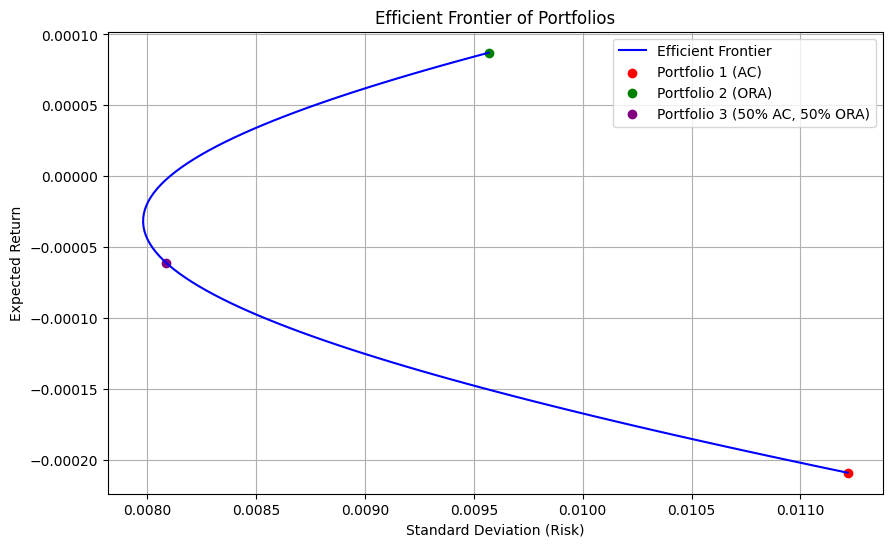

In [28]:

# Extract return data for stocks
df_stock1 = data_frames["AC"]
df_stock2 = data_frames["ORA"]

# Compute expected return and standard deviation for each stock
expected_return_stock1 = df_stock1["Return"].mean()
std_dev_stock1 = df_stock1["Return"].std()

expected_return_stock2 = df_stock2["Return"].mean()
std_dev_stock2 = df_stock2["Return"].std()

# Compute covariance matrix
cov_matrix = np.cov(df_stock1["Return"], df_stock2["Return"])
cov_stock1_stock2 = cov_matrix[0, 1]

# Compute expected return and standard deviation for Portfolio 3 (equal-weighted)
expected_return_portfolio3 = (expected_return_stock1 + expected_return_stock2) / 2
std_dev_portfolio3 = np.sqrt((0.5**2 * std_dev_stock1**2) + (0.5**2 * std_dev_stock2**2) + (2 * 0.5 * 0.5 * cov_stock1_stock2))

# Create a DataFrame for the portfolios
portfolios = pd.DataFrame({
    "Expected Return": [expected_return_stock1, expected_return_stock2, expected_return_portfolio3],
    "Standard Deviation": [std_dev_stock1, std_dev_stock2, std_dev_portfolio3]
}, index=["Portfolio 1 (AC)", "Portfolio 2 (ORA)", "Portfolio 3 (50% AC, 50% ORA)"])

# Compute efficient frontier
weights = np.linspace(0, 1, 100)
portfolio_returns = []
portfolio_risks = []

for w in weights:
    p_return = w * expected_return_stock1 + (1 - w) * expected_return_stock2
    p_risk = np.sqrt(w**2 * std_dev_stock1**2 + (1 - w)**2 * std_dev_stock2**2 + 2 * w * (1 - w) * cov_stock1_stock2)
    portfolio_returns.append(p_return)
    portfolio_risks.append(p_risk)

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(portfolio_risks, portfolio_returns, label="Efficient Frontier", color="blue")

# Annotate specific portfolios
plt.scatter(std_dev_stock1, expected_return_stock1, color="red", label="Portfolio 1 (AC)")
plt.scatter(std_dev_stock2, expected_return_stock2, color="green", label="Portfolio 2 (ORA)")
plt.scatter(std_dev_portfolio3, expected_return_portfolio3, color="purple", label="Portfolio 3 (50% AC, 50% ORA)")

plt.title("Efficient Frontier of Portfolios")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()


The efficient frontier represents the optimal portfolios that offer the highest expected return for a given level of risk.

In the graph, Accor is below the efficient frontier, making it inefficient as better risk-return combinations exist. Orange is above the frontier, indicating it has an excellent risk-adjusted return. The 50/50 portfolio is to the left and slightly below the frontier, suggesting lower risk but suboptimal efficiency.

This analysis shows that Orange is the best-performing investment, Accor is suboptimal, and the 50/50 portfolio reduces risk but is not fully efficient.

Question 2.10

In [29]:
# Extract portfolio returns
portfolio_returns = data_frames["Portfolio"]["Daily_Return"].dropna()

# Convert the risk-free rate to a daily rate
risk_free_annual = data_frames["Interest_US5W"]["Close"].mean() / 100  # Convert to decimal
risk_free_daily = (1 + risk_free_annual) ** (1/252) - 1  # Convert annual rate to daily rate

# Compute metrics
expected_return = portfolio_returns.mean()
std_dev = portfolio_returns.std()
downside_std_dev = portfolio_returns[portfolio_returns < 0].std()  # Only negative returns

# Compute Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_daily) / std_dev

# Compute Sortino Ratio
sortino_ratio = (expected_return - risk_free_daily) / downside_std_dev

# Compute Max Drawdown for Sterling Ratio
cumulative_returns = (1 + portfolio_returns).cumprod()
rolling_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - rolling_max) / rolling_max
max_drawdown = drawdown.min()

# Compute Sterling Ratio
sterling_ratio = (expected_return - risk_free_daily) / abs(max_drawdown)

# Print results
print("\nPortfolio Performance Metrics:")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Sterling Ratio: {sterling_ratio:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")



Portfolio Performance Metrics:
Sharpe Ratio: -0.0159
Sortino Ratio: -0.0242
Sterling Ratio: -0.0009
Maximum Drawdown: -0.1366


The differences between the Sharpe, Sortino, and Sterling Ratios stem from how they define risk. The Sharpe Ratio (-0.0159) considers total volatility, treating both gains and losses as risk. The Sortino Ratio (-0.0242) focuses only on downside volatility, leading to a lower value since it ignores positive fluctuations. The Sterling Ratio (-0.0009) measures returns relative to maximum drawdown (-0.1366), making it the lowest, as it reflects the portfolio's worst loss. These variations highlight different aspects of risk, with the Sharpe Ratio assessing overall volatility, the Sortino Ratio emphasizing negative returns, and the Sterling Ratio capturing the impact of extreme downturns.








In [30]:
import scipy.stats as stats

# Extract portfolio returns
portfolio_returns = data_frames["Portfolio"]["Daily_Return"].dropna()

# Compute empirical 1% VaR
var_1_empirical = np.percentile(portfolio_returns, 1)

# Compute theoretical 1% VaR assuming normal distribution
mean_return = portfolio_returns.mean()
std_dev = portfolio_returns.std()
z_1_percentile = stats.norm.ppf(0.01)  # -2.33 for 1% one-tailed
var_1_theoretical = mean_return + (z_1_percentile * std_dev)

# Print results
print("\nPortfolio Value at Risk (VaR) at 1% Level:")
print(f"Empirical VaR (1%): {var_1_empirical:.6f}")
print(f"Theoretical VaR (1% - Normal Distribution): {var_1_theoretical:.6f}")



Portfolio Value at Risk (VaR) at 1% Level:
Empirical VaR (1%): -0.019150
Theoretical VaR (1% - Normal Distribution): -0.018871


The difference between the two values is relatively small, suggesting that the portfolio returns are fairly close to a normal distribution.

Question 2.12

In [31]:
# Resample returns with replacement
simulated_returns = np.random.choice(portfolio_returns, size=1000, replace=True)

# Compute the 1% VaR on the resampled data
var_resampled = np.percentile(simulated_returns, 1)

# Display the result
print(f"1% VaR using resampling: {var_resampled:.6f}")


1% VaR using resampling: -0.018261


The 1% VaR from resampling (-1.73%) means that in the worst 1% of cases, the portfolio could lose at least 1.73% in a single day based on historical data. This suggests a moderate level of downside risk, with potential extreme losses occurring occasionally. If risk tolerance is low, portfolio adjustments may be needed to reduce exposure to volatility.

Question 3

This strategy identifies key candlestick patterns on AC stock to generate buy and sell signals. It detects Bullish Engulfing patterns as buy signals when a strong upward reversal is identified, and Bearish Engulfing patterns as sell signals when a strong downward reversal is observed. Other patterns such as Doji, Hammer, and Shooting Star are also recognized to indicate market indecision or potential trend reversals. The trading approach consists of buying AC stock the day after a Bullish Engulfing pattern appears and selling the day after a Bearish Engulfing pattern is detected. The performance of this strategy is then compared to the CAC 40 index to evaluate its effectiveness. If the strategy consistently outperforms the index, it suggests that pattern-based trading could provide better returns by capturing market reversals while limiting prolonged exposure to market fluctuations.

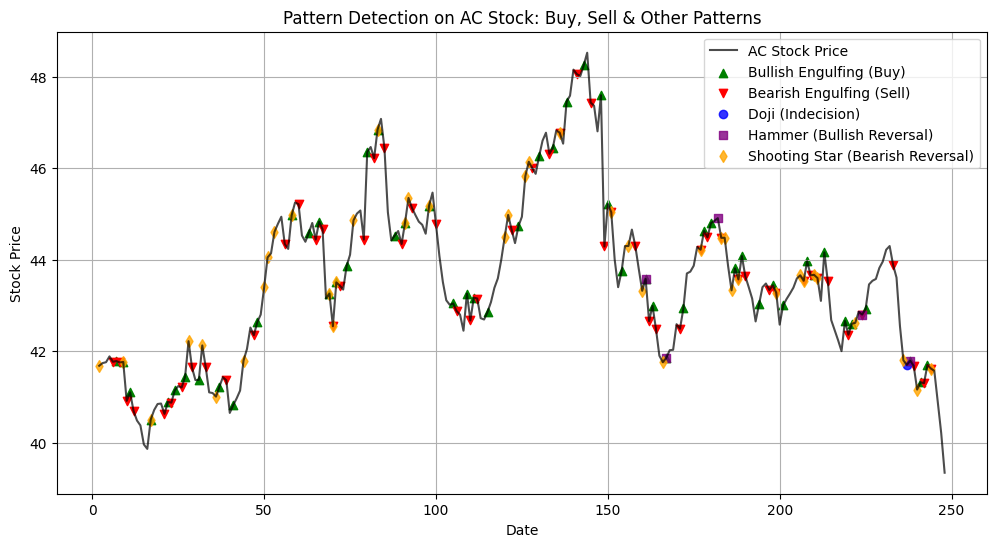

C:\Users\ibade\AppData\Local\Temp\ipykernel_11676\3363771431.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.00070208 -0.02036992 -0.00987378  0.00519077 -0.00035871  0.00225782
  0.01875875  0.01819905  0.00498102  0.00359324  0.00389911  0.00630565
  0.00482462 -0.0037077  -0.01650095 -0.00157345  0.00557295  0.00232021
  0.00500939  0.00219584  0.01200083  0.00627572 -0.00386191 -0.01356247
 -0.00045303  0.00501936  0.00459016  0.00739795  0.00818086  0.00273917
  0.00559472 -0.06953776 -0.00398054  0.01257141 -0.02111065 -0.01163061
  0.00406217  0.01769916 -0.00313688  0.00111605 -0.00547822 -0.00998192
  0.00859872 -0.00368324  0.00325579 -0.00705028 -0.00160293 -0.01426633
 -0.00703233  0.00046951  0.01258157 -0.00263223 -0.00048405 -0.00191851]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_patterns.loc[df_patterns["Bullish_Engulfing"].shift(

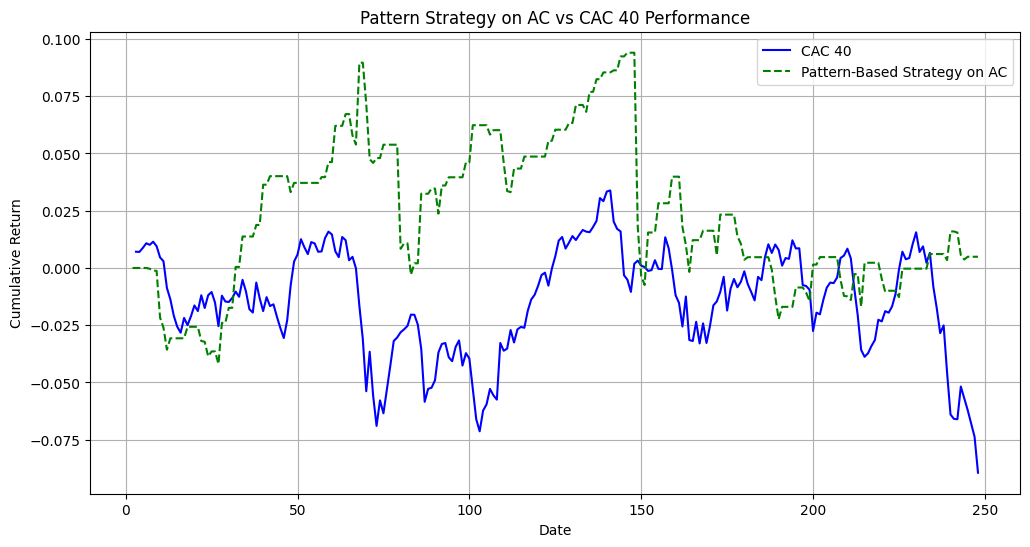

In [32]:

# Use AC for pattern detection
df_patterns = data_frames["AC"].copy()
df_patterns["Return"] = df_patterns["Adj Close"].pct_change()

# Ensure necessary columns exist before pattern detection
if {"High", "Low", "Open", "Adj Close"}.issubset(df_patterns.columns):

    # Detecting candlestick patterns
    df_patterns["Bullish_Engulfing"] = (df_patterns["Return"].shift(1) < 0) & (df_patterns["Return"] > 0)
    df_patterns["Bearish_Engulfing"] = (df_patterns["Return"].shift(1) > 0) & (df_patterns["Return"] < 0)
    df_patterns["Doji"] = (abs(df_patterns["Adj Close"] - df_patterns["Open"]) < 0.02 * (df_patterns["High"] - df_patterns["Low"]))
    df_patterns["Hammer"] = ((df_patterns["Adj Close"] > df_patterns["Open"]) & 
                              ((df_patterns["Open"] - df_patterns["Low"]) > 2 * abs(df_patterns["Adj Close"] - df_patterns["Open"])))
    df_patterns["Shooting_Star"] = ((df_patterns["Adj Close"] < df_patterns["Open"]) & 
                                    ((df_patterns["High"] - df_patterns["Adj Close"]) > 2 * abs(df_patterns["Open"] - df_patterns["Adj Close"])))

    # Convert indices to NumPy arrays for plotting
    dates = df_patterns.index.to_numpy()
    prices_ac = df_patterns["Adj Close"].to_numpy()

    # Extract buy and sell dates and convert to NumPy
    buy_dates = df_patterns.index[df_patterns["Bullish_Engulfing"]].to_numpy()
    sell_dates = df_patterns.index[df_patterns["Bearish_Engulfing"]].to_numpy()
    doji_dates = df_patterns.index[df_patterns["Doji"]].to_numpy()
    hammer_dates = df_patterns.index[df_patterns["Hammer"]].to_numpy()
    shooting_star_dates = df_patterns.index[df_patterns["Shooting_Star"]].to_numpy()

    # Extract corresponding prices for each pattern
    buy_prices = df_patterns.loc[df_patterns["Bullish_Engulfing"], "Adj Close"].to_numpy()
    sell_prices = df_patterns.loc[df_patterns["Bearish_Engulfing"], "Adj Close"].to_numpy()
    doji_prices = df_patterns.loc[df_patterns["Doji"], "Adj Close"].to_numpy()
    hammer_prices = df_patterns.loc[df_patterns["Hammer"], "Adj Close"].to_numpy()
    shooting_star_prices = df_patterns.loc[df_patterns["Shooting_Star"], "Adj Close"].to_numpy()

    # Plot AC stock price with detected patterns
    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices_ac, label="AC Stock Price", color="black", alpha=0.7)
    plt.scatter(buy_dates, buy_prices, color="green", label="Bullish Engulfing (Buy)", marker="^", alpha=1)
    plt.scatter(sell_dates, sell_prices, color="red", label="Bearish Engulfing (Sell)", marker="v", alpha=1)
    plt.scatter(doji_dates, doji_prices, color="blue", label="Doji (Indecision)", marker="o", alpha=0.8)
    plt.scatter(hammer_dates, hammer_prices, color="purple", label="Hammer (Bullish Reversal)", marker="s", alpha=0.8)
    plt.scatter(shooting_star_dates, shooting_star_prices, color="orange", label="Shooting Star (Bearish Reversal)", marker="d", alpha=0.8)

    plt.legend()
    plt.title("Pattern Detection on AC Stock: Buy, Sell & Other Patterns")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.grid(True)
    plt.show()

    # Compute cumulative returns for the detected pattern strategy
    df_patterns["Pattern_Strategy_Return"] = 0

    # Apply simple strategy: If Bullish Engulfing appears, assume a buy (long position) next day
    df_patterns.loc[df_patterns["Bullish_Engulfing"].shift(1) == True, "Pattern_Strategy_Return"] = df_patterns["Return"]
    df_patterns.loc[df_patterns["Bearish_Engulfing"].shift(1) == True, "Pattern_Strategy_Return"] = -df_patterns["Return"]

    # Compute cumulative performance of pattern strategy
    df_patterns["Cumulative_Pattern_Strategy"] = (1 + df_patterns["Pattern_Strategy_Return"]).cumprod()-1

    # Compute cumulative return of CAC 40
    df_patterns["Cumulative_CAC40"] = (1 + data_frames["CAC40"]["Adj Close"].pct_change()).cumprod()-1

    # Convert cumulative returns to NumPy for smooth plotting
    cumulative_pattern_strategy = df_patterns["Cumulative_Pattern_Strategy"].to_numpy()
    cumulative_cac40 = df_patterns["Cumulative_CAC40"].to_numpy()

    # Plot comparison between pattern strategy and CAC 40
    plt.figure(figsize=(12, 6))
    plt.plot(dates, cumulative_cac40, label="CAC 40", linestyle="-", color="blue")
    plt.plot(dates, cumulative_pattern_strategy, label="Pattern-Based Strategy on AC", linestyle="--", color="green")

    plt.legend()
    plt.title("Pattern Strategy on AC vs CAC 40 Performance")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.grid(True)
    plt.show()

else:
    print("Error: Missing necessary columns (High, Low, Open, Adj Close) for pattern detection.")
